In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/realty_data.csv')
df['m2_price'] = df.price/df.total_square
df.head(5)

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source,m2_price
0,"3-комнатная, 137 м²",NaN,63000000,127473.0,"2-й Щемиловский переулок, 5а",55.778894,37.608844,Квартира,137.0,3.0,6.0,Москва,NaN,Тверской район,NaN,Просторная квартира свободной планировки с пан...,ЦИАН,459854.014599
1,"Студия, 16,7 м²",NaN,3250000,108815.0,"Харлампиева, 46",55.551025,37.313054,Квартира,16.7,NaN,1.0,Москва,NaN,Филимонковское поселение,NaN,ВНИМАНИЕ! ОЧЕНЬ ПРИВЛЕКАТЕЛЬНОЕ ПРЕ...,Домклик,194610.778443
2,"3-комнатная, 76 м²",NaN,16004680,NaN,"ЖК Прокшино, 8 к4",55.594802,37.431264,Квартира,76.0,3.0,6.0,Москва,NaN,Сосенское поселение,NaN,"Apт.1684018. 0,01% - гибкая ипотека! Воспользу...",Яндекс.Недвижимость,210587.894737
3,"1-комнатная, 24 м²",NaN,7841776,NaN,"ЖК Прокшино, 6 к2",55.594332,37.428099,Квартира,24.0,1.0,10.0,Москва,NaN,Сосенское поселение,NaN,Продается однокомнатная квартира № 381 в новос...,Новострой-М,326740.666667
4,"3-комнатная, 126 м²",NaN,120000000,121352.0,"Давыдковская, 18",55.721097,37.464342,Квартира,126.0,3.0,16.0,Москва,NaN,Фили-Давыдково район,NaN,Шикарное предложение!\nПродаётся трёхкомнатная...,Домклик,952380.952381


In [7]:
df.isna().any(axis=0)

product_name    False
period           True
price           False
postcode         True
address_name     True
lat             False
lon             False
object_type     False
total_square    False
rooms            True
floor           False
city             True
settlement       True
district         True
area             True
description      True
source          False
m2_price        False
dtype: bool

In [9]:
df.isna().all(axis=0)

product_name    False
period           True
price           False
postcode        False
address_name    False
lat             False
lon             False
object_type     False
total_square    False
rooms           False
floor           False
city            False
settlement      False
district        False
area            False
description     False
source          False
m2_price        False
dtype: bool

In [ ]:
# В городе колонка settlement null
df[df.city.isna()].settlement.isna().any()

False

In [31]:
# чтобы не плодить кучу разных колонок для обозначения района, объединяем settlement, district, area
df['location'] = df['settlement'].combine_first(df['district'])
df['location'] = df['location'].combine_first(df['area'])
df['location'].isna().sum()

3877

In [6]:
df.source.value_counts()

source
ЦИАН                   42171
Домклик                36926
Новострой-М            10909
Яндекс.Недвижимость     8816
Name: count, dtype: int64

In [8]:
df.period[~df.period.isna()]

Series([], Name: period, dtype: float64)

In [ ]:
df.object_type.value_counts()

# поле не имеет смысла

object_type
Квартира    98822
Name: count, dtype: int64

In [12]:
df.city.value_counts()

city
Москва          73180
Балашиха         2914
Химки            2330
Люберцы          1965
Красногорск      1772
Мытищи           1708
Одинцово         1247
Королёв           981
Котельники        897
Долгопрудный      761
Видное            682
Московский        653
Реутов            581
Щёлково           457
Пушкино           419
Лобня             407
Ивантеевка        293
Щербинка          233
Дзержинский       181
Лыткарино         166
Подольск          101
Name: count, dtype: int64

In [14]:
df.settlement[~df.settlement.isna()]

5           д. Мисайлово
7          пос. ВНИИССОК
29          рп. Дрожжино
35       рп. Октябрьский
45         с. Немчиновка
              ...       
98778        с. Молоково
98784       рп. Дрожжино
98805      с. Домодедово
98814    рп. Октябрьский
98815        рп. Заречье
Name: settlement, Length: 6894, dtype: object

In [16]:
df.area.value_counts()

area
Самолёт м-н            649
Новые Химки м-н        612
Старые Химки м-н       607
Железнодорожный м-н    517
Люберецкие Поля м-н    496
                      ... 
Сокол пос.               1
Котово м-н               1
Северный м-н             1
Клязьма м-н              1
Кожухово пос.            1
Name: count, Length: 269, dtype: int64

In [17]:
df.total_square.min()

8.0

<Axes: ylabel='Frequency'>

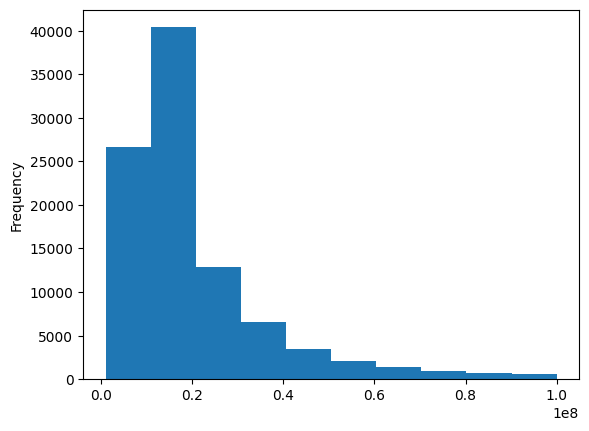

In [16]:
df.price.plot.hist(range=(1000000,100000000))

In [18]:
df.rooms.value_counts(dropna=False)

rooms
2.0     34278
1.0     26938
3.0     24885
4.0      6379
NaN      3982
5.0      1618
6.0       649
7.0        45
8.0        23
9.0        11
10.0        8
12.0        2
11.0        1
14.0        1
15.0        1
13.0        1
Name: count, dtype: int64

### В первом приближении цена квартиры пропорциональна стоимости м2 на площадь


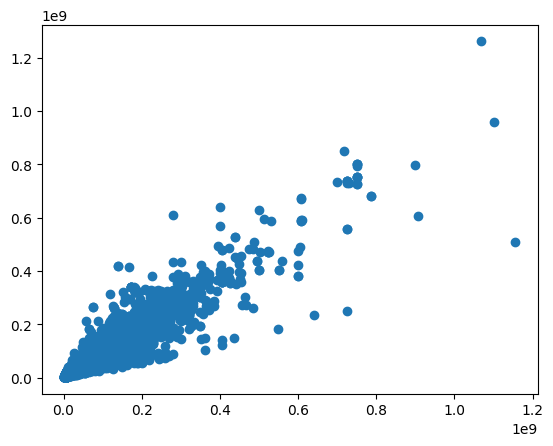

In [5]:
from sklearn.neighbors import RadiusNeighborsRegressor
import numpy as np

model = RadiusNeighborsRegressor(algorithm = 'ball_tree', radius=0.5 / 6371, metric='haversine', n_jobs = 20)
model.fit(df[['lat', 'lon']], df['m2_price'])

indices = model.radius_neighbors(return_distance=False)
res = []
mean_val = df['m2_price'].mean()
for i in range(len(indices)):
    valid_inds = indices[i]
    if len(valid_inds) > 0:
        y_neigb = df['m2_price'][valid_inds]
        res.append(y_neigb.mean())
    else:
        res.append(mean_val)

df['mean_0.5'] = np.array(res)


from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(df['price'] , df['mean_0.5']*df['total_square'])

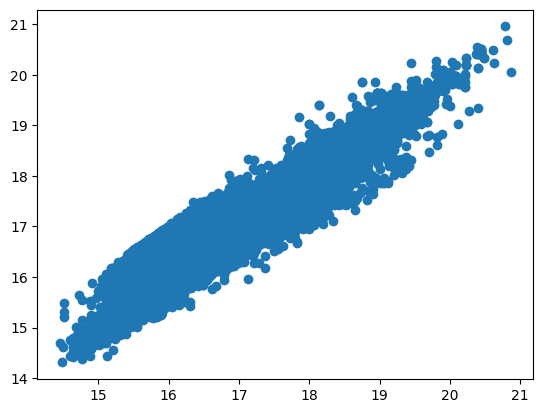

In [6]:
plt.scatter(np.log(df['price']) , np.log(df['mean_0.5']) + np.log(df['total_square']))

### В логарифмическом масштабе получается даже лучше 

## ИТОГО:

1. Прежде всего интересуют колонки:
   - `lat`
   - `lon`
   - `rooms`
   - `floor`
   - `city`
   - `district`
   - `area`

2. Колонки, которые не несут практически никакого смысла:
   - `postcode`
   - `period`
   - `product_name`
   - `object_type`

3. Колонка `description`:
   - Можно попробовать вытащить какие-то текстовые признаки.

4. Колонка с ценой:
   - Имеет степенное распределение, желательно ее логарифмировать.

5. Хорошее первое приближение:
   - Использовать среднюю цену за м² по окрестностям.